In [155]:
import numpy as np
import pandas as pd

In [204]:
SurvivedDf=pd.read_csv('titanic/gender_submission.csv')
TrainDf=pd.read_csv('titanic/train.csv')
TestDf=pd.read_csv('titanic/test.csv')

In [158]:
TestDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [159]:
SurvivedDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB


In [160]:
SurvivedDf.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [161]:
TrainDf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [167]:
import matplotlib.pyplot as plt

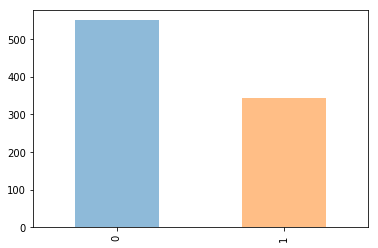

In [197]:
TrainDf.Survived.value_counts().plot(kind="bar",alpha=0.5)

Text(0.5,1,'Survived according to age')

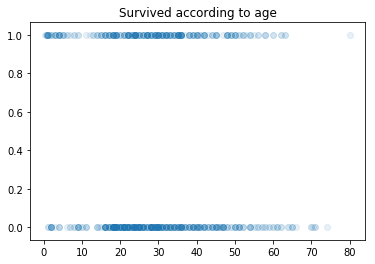

In [169]:
plt.scatter(TrainDf.Age,TrainDf.Survived,alpha=0.1)
plt.title("Survived according to age")

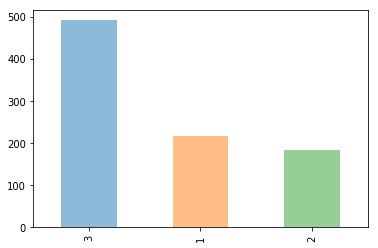

In [170]:
TrainDf.Pclass.value_counts().plot(kind='bar',alpha=0.5)


In [171]:
def bar_charts(feature):
    survived=TrainDf[TrainDf['Survived']==1][feature].value_counts()
    dead=TrainDf[TrainDf['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['Survived','dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

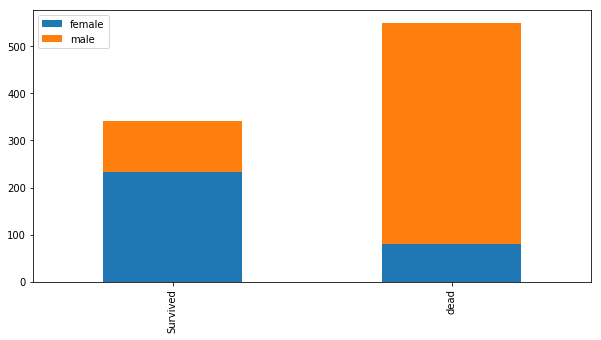

In [172]:
bar_charts('Sex')

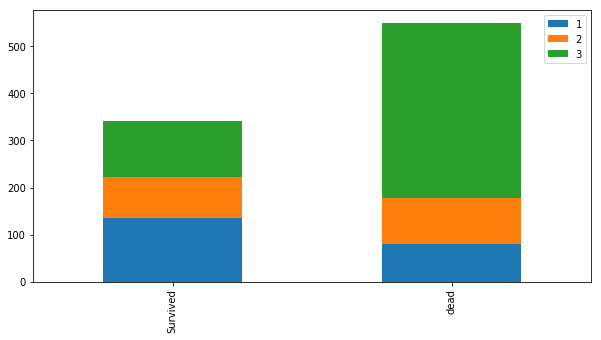

In [173]:
bar_charts('Pclass')

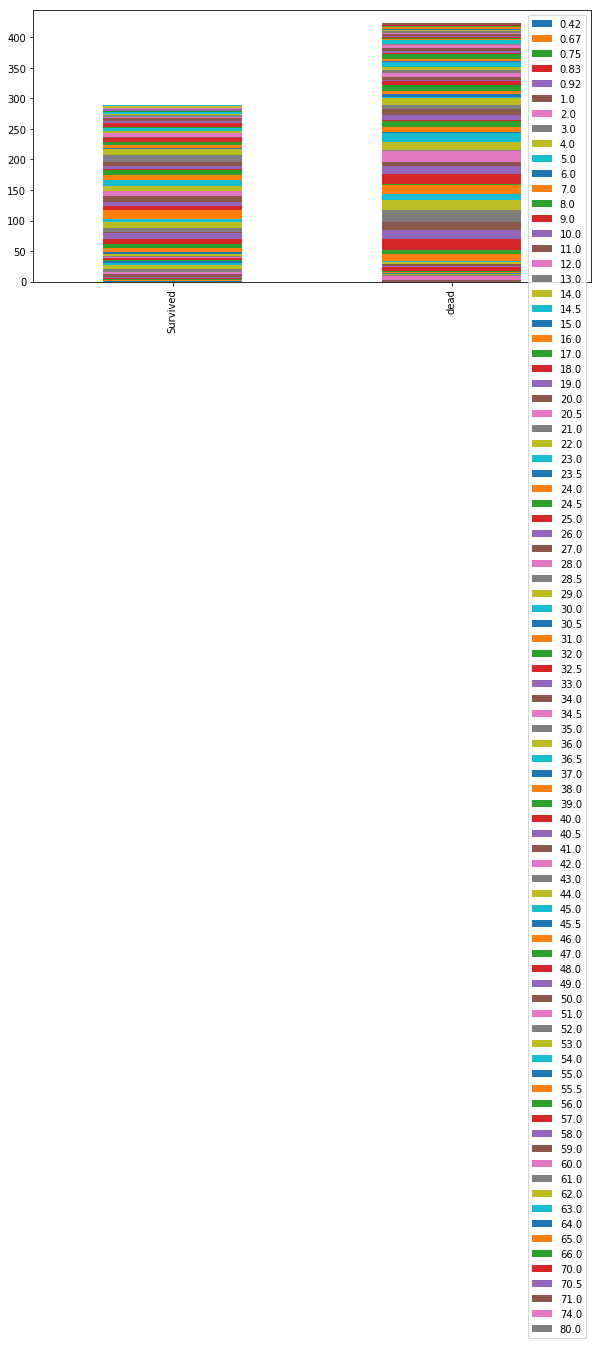

In [174]:
bar_charts('Age')

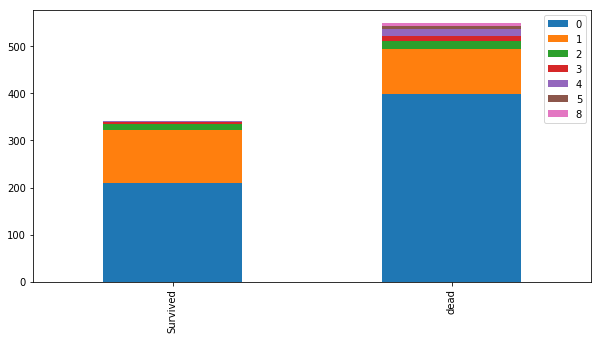

In [175]:
bar_charts('SibSp')

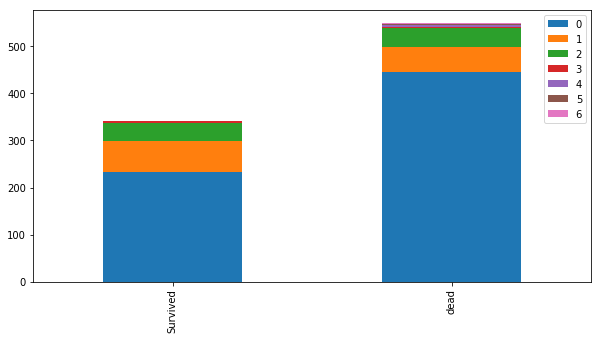

In [176]:
bar_charts('Parch')

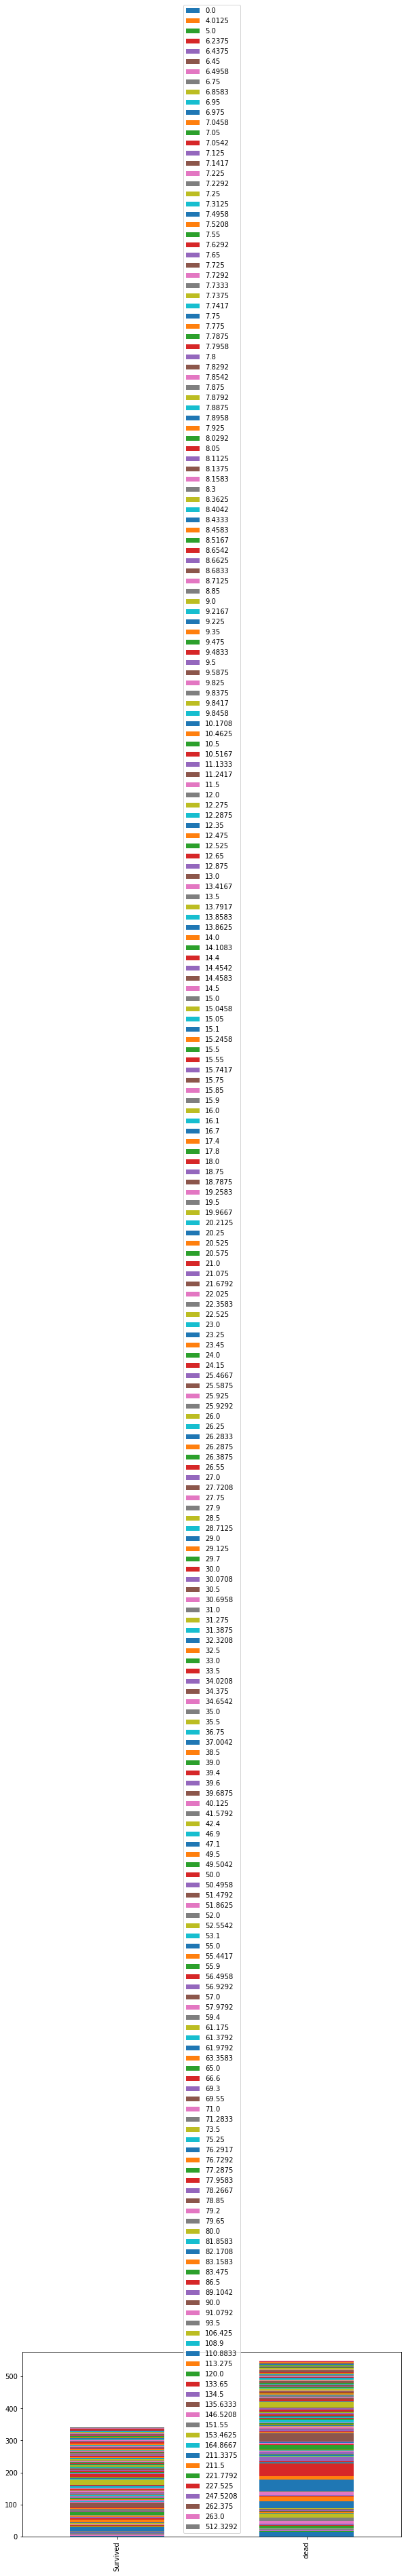

In [177]:
bar_charts('Fare')

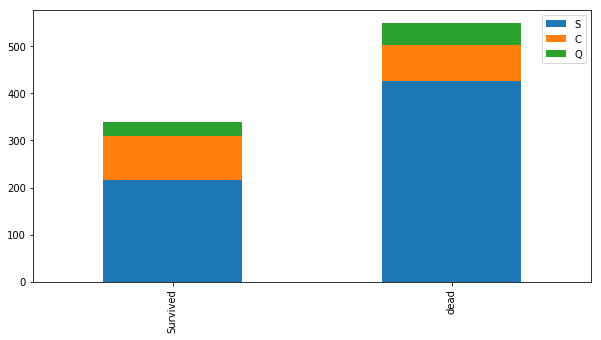

In [178]:
bar_charts('Embarked')

In [205]:
df=[TrainDf,TestDf]

In [206]:
for dataset in df:
    dataset['Title']=dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [207]:
title_mapping={"Mr.":0,"Miss":1,"Master":3,"Dr":4,"Rev":3,"Col":3,"Major":3,"Countess":3,"Ms":3,"Lady":3,"Jonkheer":3,"Don":3,"Mme":3,"Capt":3,"Sir":3}

for dataset in df:
    dataset['Title']=dataset['Title'].map(title_mapping)

In [179]:
#here through visualisation we see that certain trends that are seen in this dataset are followed in the dataset

In [211]:
TrainDf.drop('Name',axis=1,inplace=True)
TestDf.drop('Name',axis=1,inplace=True)

In [190]:
#Encoding the fields of Sex and Embarked
TrainDf["Sex"]=TrainDf["Sex"].replace("male",0).replace("female",1)
TrainDf["Embarked"]=TrainDf["Embarked"].replace("C",0).replace("S",1).replace("Q",2)

In [181]:
TrainDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0


In [212]:
TrainDf['Age'].fillna(TrainDf.groupby('Title')['Age'].transform('median'),inplace=True)
TestDf['Age'].fillna(TestDf.groupby('Title')['Age'].transform('median'),inplace=True)

In [214]:
TrainDf.head(30)
TrainDf.groupby("Title")["Age"].transform("median")

0       NaN
1       NaN
2      21.0
3       NaN
4       NaN
5       NaN
6       NaN
7       8.0
8       NaN
9       NaN
10     21.0
11     21.0
12      NaN
13      NaN
14     21.0
15      NaN
16      8.0
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22     21.0
23      NaN
24     21.0
25      NaN
26      NaN
27      NaN
28     21.0
29      NaN
       ... 
861     NaN
862     NaN
863    21.0
864     NaN
865     NaN
866    21.0
867     NaN
868     NaN
869     8.0
870     NaN
871     NaN
872     NaN
873     NaN
874     NaN
875    21.0
876     NaN
877     NaN
878     NaN
879     NaN
880     NaN
881     NaN
882    21.0
883     NaN
884     NaN
885     NaN
886     8.0
887    21.0
888    21.0
889     NaN
890     NaN
Name: Age, Length: 891, dtype: float64

In [186]:
import seaborn as sns

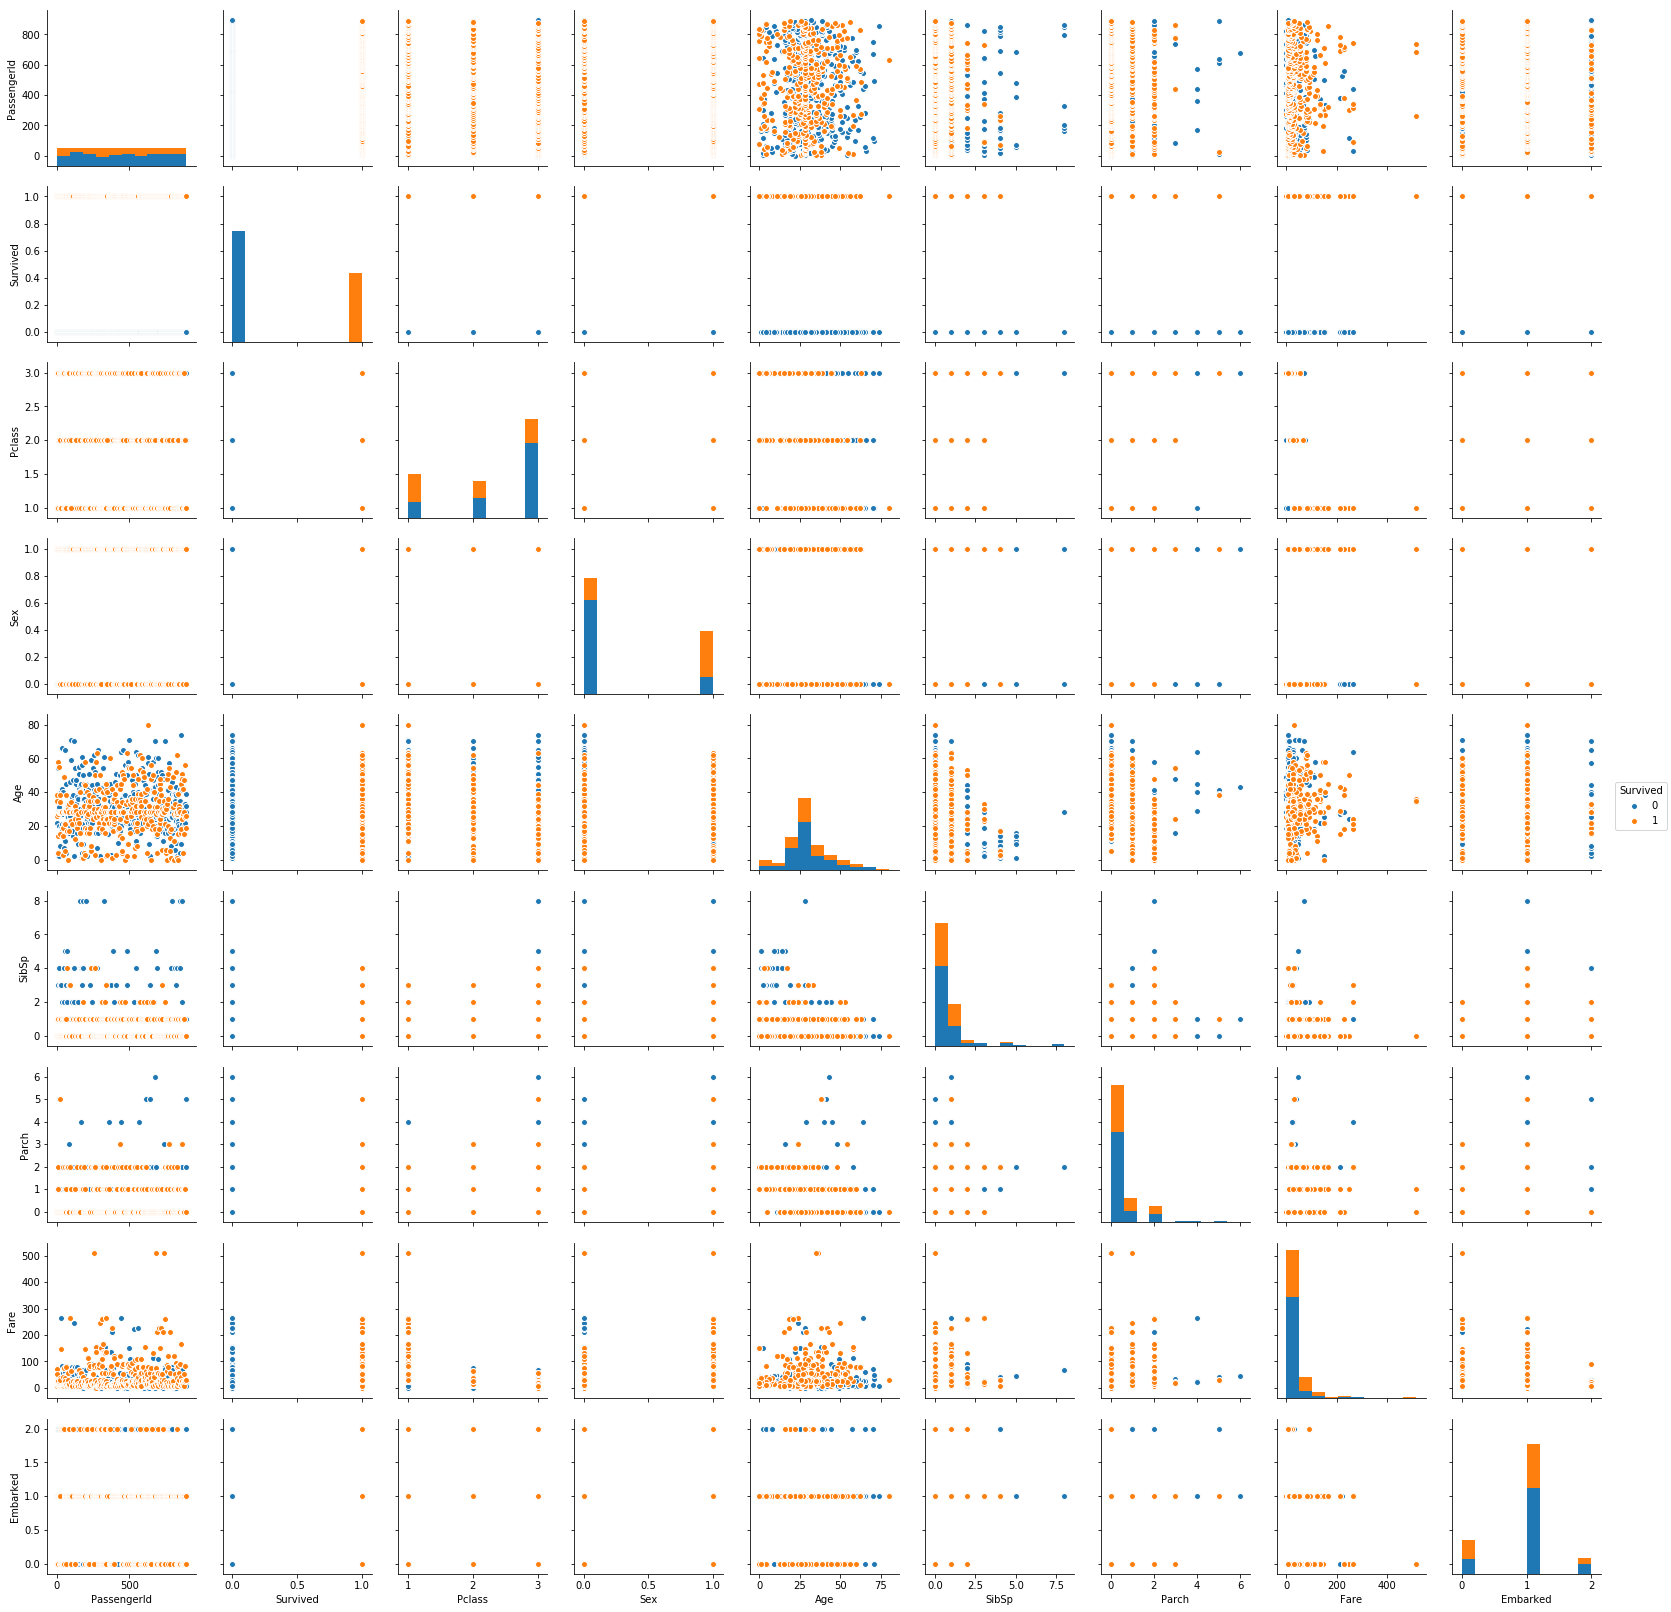

In [187]:
sns.pairplot(TrainDf, hue="Survived")

In [215]:
for dataset in df:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

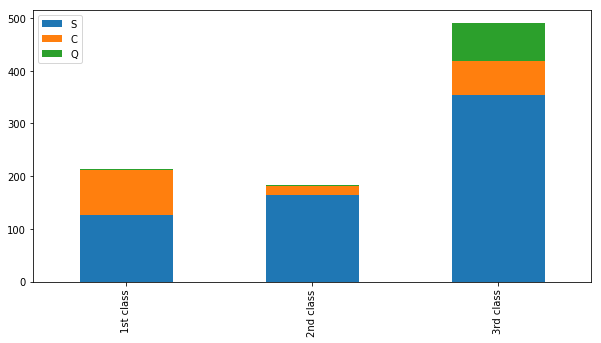

In [223]:
Pclass1 = TrainDf[TrainDf['Pclass']==1]['Embarked'].value_counts()
Pclass2 = TrainDf[TrainDf['Pclass']==2]['Embarked'].value_counts()
Pclass3 = TrainDf[TrainDf['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))